# sklearn-LDA

代码示例：https://mp.weixin.qq.com/s/hMcJtB3Lss1NBalXRTGZlQ （玉树芝兰） <br>
可视化：https://blog.csdn.net/qq_39496504/article/details/107125284  <br>
sklearn lda参数解读:https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
<br>中文版参数解读：https://blog.csdn.net/TiffanyRabbit/article/details/76445909
<br>LDA原理-视频版：https://www.bilibili.com/video/BV1t54y127U8
<br>LDA原理-文字版：https://www.jianshu.com/p/5c510694c07e
<br>score的计算方法：https://github.com/scikit-learn/scikit-learn/blob/844b4be24d20fc42cc13b957374c718956a0db39/sklearn/decomposition/_lda.py#L729
<br>主题困惑度1：https://blog.csdn.net/weixin_43343486/article/details/109255165
<br>主题困惑度2：https://blog.csdn.net/weixin_39676021/article/details/112187210

## 1.预处理

In [3]:
import os
import pandas as pd
import re
import jieba
import jieba.posseg as psg

In [4]:
output_path = 'D:/python/lda/result'
file_path = 'D:/python/lda/data'
os.chdir(file_path)
data=pd.read_excel("data.xlsx")#content type
os.chdir(output_path)
dic_file = "D:/python/lda/stop_dic/dict.txt"
stop_file = "D:/python/lda/stop_dic/stopwords.txt"

In [35]:
def chinese_word_cut(mytext):
    jieba.load_userdict(dic_file)
    jieba.initialize()
    try:
        stopword_list = open(stop_file,encoding ='utf-8')
    except:
        stopword_list = []
        print("error in stop_file")
    stop_list = []
    flag_list = ['n','nz','vn']
    for line in stopword_list:
        line = re.sub(u'\n|\\r', '', line)
        stop_list.append(line)
    
    word_list = []
    #jieba分词
    seg_list = psg.cut(mytext)
    for seg_word in seg_list:
        word = re.sub(u'[^\u4e00-\u9fa5]','',seg_word.word)
        #word = seg_word.word  #如果想要分析英语文本，注释这行代码，启动下行代码
        find = 0
        for stop_word in stop_list:
            if stop_word == word or len(word)<2:     #this word is stopword
                    find = 1
                    break
        if find == 0 and seg_word.flag in flag_list:
            word_list.append(word)      
    return (" ").join(word_list)

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
data["content_cutted"] = data.content.apply(chinese_word_cut)

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2.LDA分析

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
def print_top_words(model, feature_names, n_top_words):
    tword = []
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        topic_w = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        tword.append(topic_w)
        print(topic_w)
    return tword

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
n_features = 1000 #提取1000个特征词语
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(data.content_cutted)

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
n_topics = 8
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=50,
                                learning_method='batch',
                                learning_offset=50,
#                                 doc_topic_prior=0.1,
#                                 topic_word_prior=0.01,
                               random_state=0)
lda.fit(tf)

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(learning_offset=50, max_iter=50, n_components=8,
                          random_state=0)

### 2.1输出每个主题对应词语 

In [11]:
n_top_words = 25
tf_feature_names = tf_vectorizer.get_feature_names()
topic_word = print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
电影 票房 影片 观众 演员 作品 故事 电影节 娱乐 合作 主演 角色 内地 市场 香港电影 新片 方面 制作 公司 剧本 媒体 人生 开奖 本片 成绩
Topic #1:
比赛 球队 主场 时间 火箭 球员 联赛 总决赛 篮板 奇才 客场 赛事 机会 新浪 战队 赛区 状态 问题 体育讯 助攻 情况 训练 湖人 内线 球迷
Topic #2:
主持人 工作 时间 研究 网站 新浪 记者 生活 朋友 现场 感觉 科学家 过程 人们 人类 事情 互联网 孩子 问题 网友 人员 地方 世界 经历 文化
Topic #3:
项目 建筑 生活 地产 区域 空间 新浪 户型 活动 房子 发展 别墅 设计 产品 国际 文化 主持人 艺术 论坛 市场 客户 住宅 集团 高端 评论
Topic #4:
学生 主队 赔率 大学 学校 公司 数据 教育 专业 情况 客胜 移民 问题 留学生 语言 能力 主场 客队 家长 足彩 建议 成绩 课程 论文 英语
Topic #5:
经济 投资 市场 公司 发展 政府 企业 问题 政策 计划 国家 银行 影响 资金 基金 服务 管理 业务 行业 产业 文章 商业 机构 风险 全球
Topic #6:
游戏 电子竞技 玩家 手机 奖金 公司 网络 世界 用户 职业 发展 冠军 平台 任务 俱乐部 全球 行业 系统 模式 国际 活动 太空 爱好者 项目 星际
Topic #7:
专家 网友 老师 压力 走势 分析 突破 黄金 问题 股票 大盘 建议 新浪 整理 成本 调整 a股 机会 坐堂 趋势 股市 后市 行情 市场 价位


### 2.2输出每篇文章对应主题 

In [12]:
import numpy as np

In [13]:
topics=lda.transform(tf)

In [28]:
topic = []
for t in topics:
    topic.append("Topic #"+str(list(t).index(np.max(t))))
data['概率最大的主题序号']=topic
data['每个主题对应概率']=list(topics)
data.to_excel("data_topic.xlsx",index=False)

### 2.3可视化 

In [29]:
import pyLDAvis
import pyLDAvis.sklearn

In [31]:
pyLDAvis.enable_notebook()
pic = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
pyLDAvis.display(pic)
pyLDAvis.save_html(pic, 'lda_pass'+str(n_topics)+'.html')
pyLDAvis.display(pic)
#去工作路径下找保存好的html文件
#和视频里讲的不一样，目前这个代码不需要手动中断运行，可以快速出结果

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2.4困惑度 

In [32]:
import matplotlib.pyplot as plt

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
plexs = []
scores = []
n_max_topics = 16
for i in range(1,n_max_topics):
    print(i)
    lda = LatentDirichletAllocation(n_components=i, max_iter=50,
                                    learning_method='batch',
                                    learning_offset=50,random_state=0)
    lda.fit(tf)
    plexs.append(lda.perplexity(tf))
    scores.append(lda.score(tf))

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


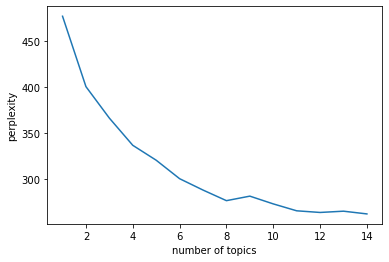

In [42]:
n_t=15#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t))
plt.plot(x,plexs[1:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

D:\software\anaconda\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


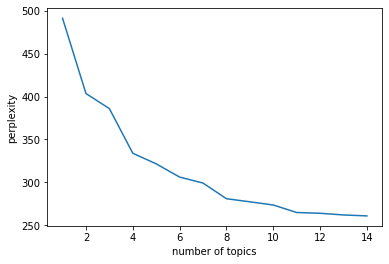

In [34]:
n_t=15#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t))
plt.plot(x,plexs[1:n_t])
plt.xlabel("number of topics")
plt.ylabel("perplexity")
plt.show()

<font color='red'> 下边的这个分数暂时没有搞懂是做什么用的 </font>

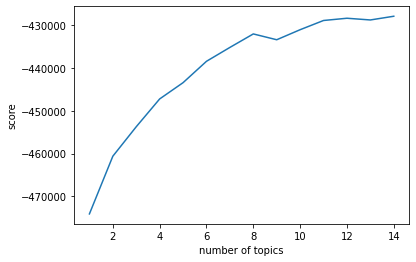

In [61]:
n_t=15#区间最右侧的值。注意：不能大于n_max_topics
x=list(range(1,n_t))
plt.plot(x,scores[1:n_t])
plt.xlabel("number of topics")
plt.ylabel("score")
plt.show()